In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
DEFAULT_CRS = "EPSG:4326"

In [3]:
favelas_gpd = gpd.read_file("../../data/shapeFiles/4326_favelas")

In [4]:
favelas_gpd

,fv_id,fv_nome,fv_nom_sec,fv_local,fv_domicil,fv_area,fv_ano_imp,fv_tp_prop,geometry
0,1,TOTÓ,None,RUA ANDRÉ FALCÃO DE RESENDE /RUA GEORG EBERS,350.0,8691.77,1962.0,Pública/Particular,"POLYGON ((-46.64856 -23.66742, -46.64865 -23.6..."
1,2,BALAPAPESP I,RUY PIROZZELLI,RUA RUY PIROZZELLI / RUA FRANCISCO BARROSO PER...,29.0,2589.24,1990.0,Pública,"MULTIPOLYGON (((-46.48253 -23.48929, -46.48253..."
2,3,VILA SANTA ZÉLIA,None,RUA DOS VIOLONCELOS,154.0,11389.10,1972.0,Pública,"POLYGON ((-46.76604 -23.68330, -46.76615 -23.6..."
3,4,BEIJA FLOR,IPECAETA,RUA IPECAETÁ / RUA CÂNDIDO AFONSO CAMARGO,200.0,12774.12,1981.0,Pública,"POLYGON ((-46.76360 -23.40632, -46.76360 -23.4..."
4,5,AUGUSTO GONZAGA,None,RUA DOUTOR AUGUSTO GONZAGA,176.0,11830.70,1975.0,Pública,"POLYGON ((-46.63718 -23.69946, -46.63684 -23.6..."
...,...,...,...,...,...,...,...,...,...
1744,1745,JAPARANDUBA I,None,None,65.0,5951.41,0.0,Sem informação,"POLYGON ((-46.57685 -23.45664, -46.57675 -23.4..."
1745,1746,ESCOLA OLINDA LEITE,None,"RUA LUCINDO PASSOS FILHO, 181",5.0,288.26,1992.0,Pública,"POLYGON ((-46.67729 -23.47389, -46.67696 -23.4..."
1746,1747,CONJUNTO DA PAZ,None,RUA SANTA LUZIA DA BOA VISÃO,8.0,809.15,0.0,Sem informação,"POLYGON ((-46.38935 -23.52316, -46.38934 -23.5..."
1747,1748,PIRATININGA I,None,RUA JOÃO BARROSO,40.0,2396.77,1972.0,Pública,"POLYGON ((-46.67366 -23.69636, -46.67332 -23.6..."


In [5]:

hex_sp = gpd.read_file("../../data/shapeFiles/GRIDS_H3_SP_RES10") 


# Transform the CRS to EPSG:31983
hex_sp = hex_sp.to_crs(DEFAULT_CRS)
hex_sp.head()

,id_hex,geometry
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5..."
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5..."
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5..."
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6..."
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8..."


# Intersecção

In [6]:
if favelas_gpd.crs != DEFAULT_CRS:
    favelas_gpd = favelas_gpd.to_crs(DEFAULT_CRS)
if hex_sp.crs != DEFAULT_CRS:
    hex_sp = hex_sp.to_crs(DEFAULT_CRS)

In [7]:
favelas_intersect_h3 =  favelas_gpd.overlay(hex_sp[['id_hex', 'geometry']], how='intersection')


In [8]:
favelas_intersect_h3.head()

,fv_id,fv_nome,fv_nom_sec,fv_local,fv_domicil,fv_area,fv_ano_imp,fv_tp_prop,id_hex,geometry
0,1,TOTÓ,None,RUA ANDRÉ FALCÃO DE RESENDE /RUA GEORG EBERS,350.0,8691.77,1962.0,Pública/Particular,8aa81000e687fff,"POLYGON ((-46.64745 -23.66703, -46.64724 -23.6..."
1,1,TOTÓ,None,RUA ANDRÉ FALCÃO DE RESENDE /RUA GEORG EBERS,350.0,8691.77,1962.0,Pública/Particular,8aa81000e68ffff,"POLYGON ((-46.64865 -23.66699, -46.64866 -23.6..."
2,1,TOTÓ,None,RUA ANDRÉ FALCÃO DE RESENDE /RUA GEORG EBERS,350.0,8691.77,1962.0,Pública/Particular,8aa81000e69ffff,"POLYGON ((-46.64751 -23.66667, -46.64748 -23.6..."
3,1,TOTÓ,None,RUA ANDRÉ FALCÃO DE RESENDE /RUA GEORG EBERS,350.0,8691.77,1962.0,Pública/Particular,8aa81000e6affff,"POLYGON ((-46.64863 -23.66707, -46.64827 -23.6..."
4,2,BALAPAPESP I,RUY PIROZZELLI,RUA RUY PIROZZELLI / RUA FRANCISCO BARROSO PER...,29.0,2589.24,1990.0,Pública,8aa810700327fff,"POLYGON ((-46.48347 -23.48930, -46.48337 -23.4..."


In [9]:
favelas_intersect_h3['intersec_geometry'] = favelas_intersect_h3.geometry

In [10]:
hex_favelas = hex_sp.join(favelas_intersect_h3[['id_hex', 'intersec_geometry']].set_index('id_hex'), how='left', on='id_hex')
hex_favelas = gpd.GeoDataFrame(hex_favelas, crs=DEFAULT_CRS, geometry="geometry")

In [11]:
hex_favelas['area_hex'] = hex_favelas.geometry.to_crs("EPSG:5641").area
hex_favelas['area_favela'] = gpd.GeoSeries(hex_favelas['intersec_geometry']).to_crs("EPSG:5641").area
hex_favelas['prop_ocupado'] = hex_favelas['area_favela']/hex_favelas['area_hex'] 

<Axes: ylabel='Frequency'>

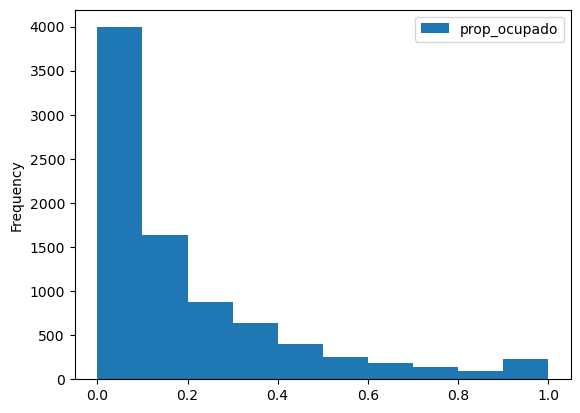

In [12]:
hex_favelas.plot.hist(column=['prop_ocupado'])

In [14]:
hex_favelas['is_fav_comunidade'] = hex_favelas['prop_ocupado'] > 0.5

In [15]:
hex_favelas.head()

,id_hex,geometry,intersec_geometry,area_hex,area_favela,prop_ocupado,is_fav_comunidade
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5...",None,18002.590726,NaN,NaN,False
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5...",None,18009.360752,NaN,NaN,False
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5...",None,17997.005022,NaN,NaN,False
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6...","POLYGON ((-46.59187 -23.61328, -46.59200 -23.6...",18001.760632,18001.760632,1.0,True
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8...",None,17986.265306,NaN,NaN,False


<Axes: >

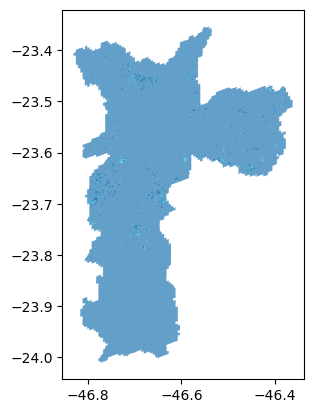

In [16]:
hex_favelas.plot(column='is_fav_comunidade', label=True)

In [17]:
hex_favelas.drop('intersec_geometry', axis=1, inplace=True)

In [18]:
hex_favelas.head()

,id_hex,geometry,area_hex,area_favela,prop_ocupado,is_fav_comunidade
0,8aa8100c3257fff,"POLYGON ((-46.63592 -23.53032, -46.63664 -23.5...",18002.590726,NaN,NaN,False
1,8aa8100d2447fff,"POLYGON ((-46.53650 -23.53972, -46.53722 -23.5...",18009.360752,NaN,NaN,False
2,8aa8100e1637fff,"POLYGON ((-46.66886 -23.59437, -46.66958 -23.5...",17997.005022,NaN,NaN,False
3,8aa8100f0827fff,"POLYGON ((-46.59115 -23.61353, -46.59187 -23.6...",18001.760632,18001.760632,1.0,True
4,8aa81010ec07fff,"POLYGON ((-46.65231 -23.83331, -46.65303 -23.8...",17986.265306,NaN,NaN,False


In [20]:
hex_favelas.to_file("../../data/WGS84_hex_favelas.gpkg", driver="GPKG")
